In [42]:
%matplotlib inline

In [43]:
import pandas as pd

In [44]:
from sklearn import datasets

In [45]:
from sklearn.cluster import KMeans

In [46]:
import numpy as np

In [47]:
from scipy.stats import zscore

In [48]:
from sklearn.metrics import silhouette_score

In [49]:
model = KMeans(n_clusters = 3)

In [50]:
teens_df = pd.read_csv("D:\ML-Data\snsdata.csv")

In [51]:
teens_df_rows , teens_df_cols = teens_df.shape
print(teens_df_rows)
print(teens_df_cols)

30000
40


Check for missing values in the columns

In [52]:
## for col in teens_df:
##    print (col)
##    print (teens_df[col].value_counts(dropna=False))

In [53]:
teens_df = teens_df.fillna({'age': teens_df.age.mean()})       ## Crude way of addresssing missing value cases                                                                                                      

Think of a better strategy of handling missing values in age.... could we have guessed the age from any other column?

In the folowing line, interest columns are extrated and stored in separate dataframe called interest_df. These columns will form the dimensions for the cluster analysis. Notice, the interest column seem to be some kind of relative weights and since we don't know what is the range of weights, we will scale all the interest columns

In [54]:
interest_df = teens_df.loc[:, 'basketball':'drugs']

In [55]:
interest_df_z = interest_df.apply(zscore)

interest_df_z

Let us look for 5 clusters. Why 5? Discuss 

In [56]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [57]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5 )
  clusters.fit(interest_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,1.080000e+06,1
1,1.023758e+06,2
2,9.941142e+05,3
3,9.677880e+05,4
4,9.386836e+05,5
5,9.220580e+05,6
6,8.924490e+05,7
7,8.724097e+05,8
8,8.691173e+05,9
9,8.407002e+05,10


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

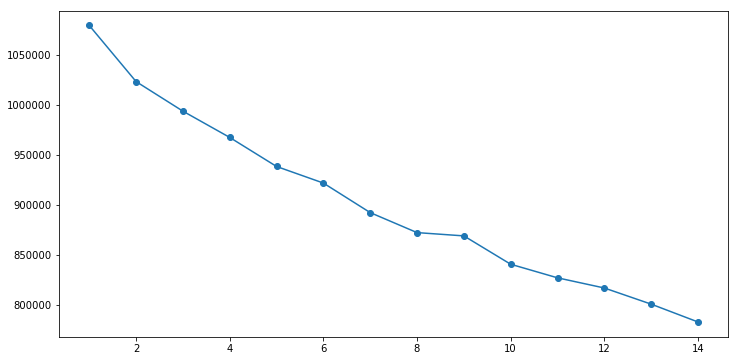

In [58]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [59]:
kmeans = KMeans(n_clusters=10, n_init = 15, random_state=2345)

In [60]:
kmeans.fit(interest_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [61]:
centroids = kmeans.cluster_centers_

In [62]:
centroid_df = pd.DataFrame(centroids, columns = list(interest_df_z) )

In [63]:
centroid_df

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.633233,0.178900,-0.025690,6.129584,0.604357,0.098377,-0.005926,0.157782,-0.049483,0.519019,...,0.014703,0.116822,0.238682,0.166285,0.016814,0.009366,-0.017283,0.075957,-0.040724,-0.007711
1,0.077076,0.075409,0.103200,-0.163077,0.026208,0.100115,-0.100599,-0.027297,6.580738,0.179117,...,0.017875,-0.071476,0.066201,0.064527,-0.063828,-0.012284,-0.065495,0.033529,-0.064929,-0.064388
2,-0.192724,-0.222587,-0.127528,-0.139145,-0.120441,-0.099307,-0.113836,-0.145085,-0.120301,-0.162654,...,-0.029739,-0.203647,-0.249008,-0.201841,-0.159390,-0.149693,-0.095537,-0.082624,-0.092355,-0.114883
3,-0.015945,-0.009980,-0.044198,-0.077931,-0.005563,0.275401,0.383795,-0.082583,-0.077719,-0.082830,...,0.021534,0.724073,0.932762,0.566220,-0.032690,-0.062663,0.056195,0.129627,0.049743,-0.056258
4,1.228033,1.488392,1.019097,0.031380,0.749465,0.070315,0.083263,1.186566,-0.046921,1.001811,...,0.031805,-0.035563,-0.041385,-0.063429,-0.105313,-0.128418,-0.072198,-0.059169,-0.084506,-0.084209
5,-0.081965,0.066894,-0.111517,-0.059701,-0.067672,0.042993,-0.116972,-0.112056,-0.049078,-0.092515,...,-0.010173,-0.090370,-0.052494,-0.004656,-0.171696,-0.139933,0.000104,0.037949,-0.091030,-0.060334
6,0.137283,0.208062,0.095661,-0.026394,0.174838,0.233311,0.410166,0.016116,0.027472,0.086337,...,0.063341,0.593946,0.788868,0.572594,4.149646,3.993850,0.054952,0.081750,0.042870,0.043782
7,0.089985,0.042180,-0.012242,-0.050383,-0.019989,0.070680,0.000397,-0.033211,0.008796,-0.047647,...,0.005170,-0.072012,0.040695,0.011311,-0.096726,-0.114240,0.266334,0.364641,0.047282,0.053909
8,0.331875,0.344425,0.105548,0.042440,0.102093,0.268125,0.171245,0.241040,0.066466,0.740697,...,0.187696,0.597415,0.238723,1.174706,0.170814,0.274997,1.760589,0.937699,1.937795,2.851011
9,-0.332217,2.477795,-0.242874,-0.217928,-0.223670,1.674334,-0.207327,-0.201131,-0.168939,-0.297123,...,168.307291,-0.369915,-0.487314,1.801613,-0.201476,-0.183032,9.312807,13.475099,14.812744,-0.174908


Let us put the centroids back to the teens data frame and extract other information which were not included in clustering

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [64]:
## creating a new dataframe only for labels and converting it into categorical variable
teens_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

teens_labels['labels'] = teens_labels['labels'].astype('category')

In [65]:
# Joining the label dataframe with the teens data frame to create teens_df_labeled. Note: it could be appended to original dataframe
teens_df_labeled = teens_df.join(teens_labels)

In [71]:
teen_analysis = (teens_df_labeled.groupby(['labels'] , axis=0)).head(30000)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
teen_analysis

pandas.core.frame.DataFrame